### Importing required libraries

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import joblib
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

### Loading the data

In [ ]:
train_df = pd.read_excel("/content/Data_Train_flight.xlsx")

In [ ]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test_df = pd.read_excel("/content/Test_set_flight.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Combining the train and test data into a single dataframe

In [ ]:
final_df = train_df.append(test_df)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
final_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


### Featuring Engineering

In [ ]:
final_df.columns.unique()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
a = final_df["Date_of_Journey"].str

In [ ]:
print(a)

In [ ]:
a = a.split("/")

In [ ]:
a

0       [24, 03, 2019]
1        [1, 05, 2019]
2        [9, 06, 2019]
3       [12, 05, 2019]
4       [01, 03, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 13354, dtype: object

In [ ]:
type(a)

pandas.core.series.Series

In [ ]:
a = a.str

In [ ]:
type(a)

pandas.core.strings.accessor.StringMethods

In [ ]:
a

In [ ]:
a[1]

0       03
1       05
2       06
3       05
4       03
        ..
2666    06
2667    03
2668    03
2669    03
2670    06
Name: Date_of_Journey, Length: 13354, dtype: object

In [ ]:
final_df["Date_of_Journey"].str.split("/").str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [ ]:
# Feature Engineering

final_df["Date"] = final_df["Date_of_Journey"].str.split("/").str[0]
final_df["Month"] = final_df["Date_of_Journey"].str.split("/").str[1]
final_df["Year"] = final_df["Date_of_Journey"].str.split("/").str[2]

In [ ]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [ ]:
# Casting those features as int datatype

final_df["Date"] = final_df["Date"].astype("int")
final_df["Month"] = final_df["Month"].astype("int")
final_df["Year"] = final_df["Year"].astype("int")

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [ ]:
# Since the split columns provide the information required the "Date_of_Journey" columns become redundant
final_df.drop("Date_of_Journey", axis=1, inplace=True)

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [ ]:
# The Arrival_Time columns also has value of the date of arrival which is not required, hence it is sliced from the time

final_df["Arrival_Time"] = final_df["Arrival_Time"].str.split(" ").str[0]
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [ ]:
# Arrival time can be split into arrival hour and arrival minute.

final_df["Arrival Hour"] = final_df["Arrival_Time"].str.split(":").str[0]
final_df["Arrival Minute"] = final_df["Arrival_Time"].str.split(":").str[1]

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [ ]:
# Arrival Hour and Arrival Minute are converted back to integer

final_df["Arrival Hour"] = final_df["Arrival Hour"].astype("int")
final_df["Arrival Minute"] = final_df["Arrival Minute"].astype("int")

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival Hour     13354 non-null  int64  
 14  Arrival Minute   13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
# Since the column Arrival_Tiem has become redundant, it is dropped from the dataframe

final_df.drop("Arrival_Time", axis=1, inplace=True)

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


### The Dep_Time column is split into Departure Hour and Departure Minute

In [ ]:
final_df["Departure Hour"] = final_df["Dep_Time"].str.split(":").str[0]
final_df["Departure Minute"] = final_df["Dep_Time"].str.split(":").str[1]

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df["Departure Hour"] = final_df["Departure Hour"].astype("int")
final_df["Departure Minute"] = final_df["Departure Minute"].astype("int")

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Dep_Time          13354 non-null  object 
 5   Duration          13354 non-null  object 
 6   Total_Stops       13353 non-null  object 
 7   Additional_Info   13354 non-null  object 
 8   Price             10683 non-null  float64
 9   Date              13354 non-null  int64  
 10  Month             13354 non-null  int64  
 11  Year              13354 non-null  int64  
 12  Arrival Hour      13354 non-null  int64  
 13  Arrival Minute    13354 non-null  int64  
 14  Departure Hour    13354 non-null  int64  
 15  Departure Minute  13354 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory

In [ ]:
final_df.drop("Dep_Time", axis=1, inplace=True)

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
# Cheacking the missing values in the data
final_df.isnull().sum()

# The missing values in Price column are form test dataset


Airline                0
Source                 0
Destination            0
Route                  1
Duration               0
Total_Stops            1
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Arrival Hour           0
Arrival Minute         0
Departure Hour         0
Departure Minute       0
dtype: int64

In [ ]:
final_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
# Encoding the values with corresponding number of stops
final_df["Total_Stops"] = final_df["Total_Stops"].map({"non-stop":0, "1 stop": 1, "2 stops":2, "3 stops": 3, "4 stops": 4})

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df[final_df["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [ ]:
# Assuming that there will be two stops between Delhi and Cochin and filling it in the missing place
final_df["Total_Stops"].fillna(2, axis=0, inplace=True)

In [ ]:
final_df[final_df["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute


In [ ]:
final_df["Total_Stops"].isnull().sum()

0

In [ ]:
(final_df["Duration"].str.split(" ").str[0].str[:-1].astype("int"))

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 13354, dtype: int64

In [ ]:
final_df["Duration"].str.split(" ").str[1].str[:-1]

0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration, Length: 13354, dtype: object

In [ ]:
# It can be seen that there are null values in the minute column in the third row It is checked below for other rows where it has occured.

final_df[final_df["Duration"].str.split(" ").str[1].str[:-1].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2.0,No info,13381.0,12,6,2019,19,15,20,15
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,22h,2.0,In-flight meal not included,10919.0,15,6,2019,12,35,14,35
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1.0,No info,13062.0,21,3,2019,21,0,9,0
53,IndiGo,Banglore,Delhi,BLR → DEL,3h,0.0,No info,3943.0,18,6,2019,0,15,21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,Jet Airways,Delhi,Cochin,DEL → BOM → COK,11h,1.0,No info,NaN,9,6,2019,19,0,8,0
2604,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,10h,1.0,No info,NaN,12,6,2019,19,15,9,15
2607,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1.0,No info,NaN,3,3,2019,21,0,8,0
2622,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,In-flight meal not included,NaN,3,5,2019,20,45,17,45


In [ ]:
# There is a value of 5 minutes for duration in a row
# These two rows are dropped as it is not possible for duration to be so small
final_df[final_df["Duration"]=="5m"]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,NaN,12,3,2019,16,55,16,50


In [ ]:
final_df.drop(final_df[final_df["Duration"]=="5m"].index, inplace=True)

In [ ]:
final_df[final_df["Duration"]=="5m"]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute


###Duration column is split into Duration Hr and Duration Min columns

In [ ]:
final_df["Duration Hr"] = final_df["Duration"].str.split(" ").str[0].str[:-1].astype("int")

In [ ]:
final_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15


In [ ]:
final_df["Duration Min"] = final_df["Duration"].str.split(" ").str[1].str[:-1]

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [ ]:
# Filling the missing value for Duration Minute with 0

final_df["Duration Min"].fillna(0, inplace=True)

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [ ]:
final_df["Duration Min"].isnull().sum()

0

In [ ]:
# Casting the Duration Minute column into int datatype

final_df["Duration Min"] = final_df["Duration Min"].astype("int")

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13351 non-null  object 
 1   Source            13351 non-null  object 
 2   Destination       13351 non-null  object 
 3   Route             13350 non-null  object 
 4   Duration          13351 non-null  object 
 5   Total_Stops       13351 non-null  float64
 6   Additional_Info   13351 non-null  object 
 7   Price             10681 non-null  float64
 8   Date              13351 non-null  int64  
 9   Month             13351 non-null  int64  
 10  Year              13351 non-null  int64  
 11  Arrival Hour      13351 non-null  int64  
 12  Arrival Minute    13351 non-null  int64  
 13  Departure Hour    13351 non-null  int64  
 14  Departure Minute  13351 non-null  int64  
 15  Duration Hr       13351 non-null  int64  
 16  Duration Min      13351 non-null  int64  

In [ ]:
final_df["Duration Min"] = (final_df["Duration Hr"]*60) +final_df["Duration Min"]

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Hr,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,285


In [ ]:
final_df.drop(["Duration", "Duration Hr"], axis=1, inplace=True)

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1,3,2019,21,35,16,50,285


In [ ]:
final_df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
count,13351.000000,10681.000000,13351.000000,13351.000000,13351.0,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000
mean,0.825856,9085.898979,13.390607,4.710733,2019.0,13.395776,24.658827,12.512995,24.502659,642.445135
std,0.674529,4610.921950,8.439749,1.165511,0.0,6.896836,16.557178,5.736678,18.831696,506.641268
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,175.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000


In [ ]:
categorical_cols = final_df.select_dtypes(include=object).columns.tolist()

In [ ]:
print(categorical_cols)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [ ]:
# Removing the Route column
categorical_cols.remove("Route")

In [ ]:
numerical_columns = final_df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
print(numerical_columns)

['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival Hour', 'Arrival Minute', 'Departure Hour', 'Departure Minute', 'Duration Min']


In [ ]:
numerical_columns.remove("Price")

### Exploratory Data Analysis

In [ ]:
# Getting the names of the Different Airline companies

final_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
airline_names = final_df["Airline"].unique().tolist()
print(airline_names)

['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet']


In [ ]:
# The count of each Airline in the data
final_df["Airline"].value_counts().values

array([4745, 2564, 2190, 1543, 1026,  608,  405,  240,   16,    8,    5,
          1])

In [ ]:
airline_values = final_df["Airline"].value_counts().values
airline_values

array([4745, 2564, 2190, 1543, 1026,  608,  405,  240,   16,    8,    5,
          1])

### Plotting the top 5 most frequent Airlines

In [ ]:
matplotlib.rcParams["figure.figsize"] = (10, 10)

([<matplotlib.patches.Wedge at 0x7f9e79962bd0>,
 [Text(0.3622256294383622, 1.0386494083077227, 'IndiGo'),
  Text(-1.0999926944505556, 0.0040090092799467385, 'Air India'),
  Text(-0.36357727603796325, -1.0381770390202314, 'Jet Airways'),
  Text(0.6524339312884574, -0.8856240541581336, 'SpiceJet'),
  Text(1.0609965327467337, -0.2903211282345973, 'Multiple carriers')],
 [Text(0.19757761605728844, 0.5665360408951214, '39.32%'),
  Text(-0.5999960151548485, 0.0021867323345164023, '21.25%'),
  Text(-0.19831487783888901, -0.5662783849201262, '18.15%'),
  Text(0.35587305343006764, -0.48306766590443645, '12.79%'),
  Text(0.5787253814982183, -0.15835697903705306, '8.50%')])

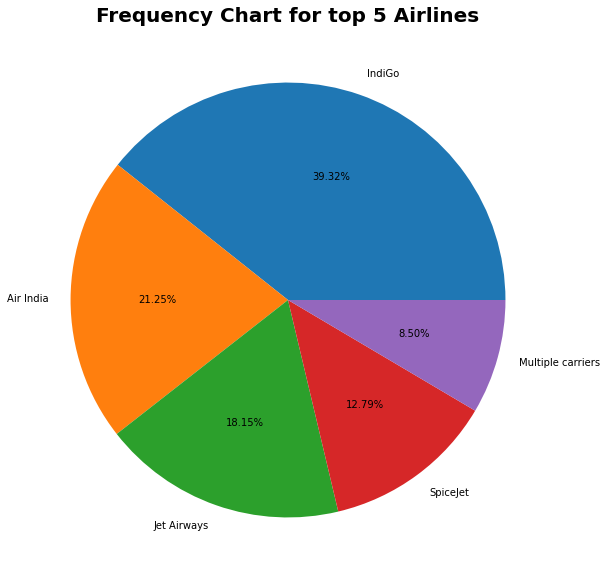

In [ ]:
plt.title("Frequency Chart for top 5 Airlines", fontweight= "bold", fontsize="20")
plt.pie(x=airline_values[:5], labels= airline_names[:5], autopct="%.2f%%")

### Observation
    

#####    The Airline appearing most of the times is IndiGo followed by Air India, Jet Airways, SpiceJet, Multiple carriers

In [ ]:
#Getting the names of the different Source Cities.
final_df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

###Plotting the five most frequent Source Cities

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Source Cities'),
 Text(0.5, 1.0, 'Frequency Chart for Source Cities')]

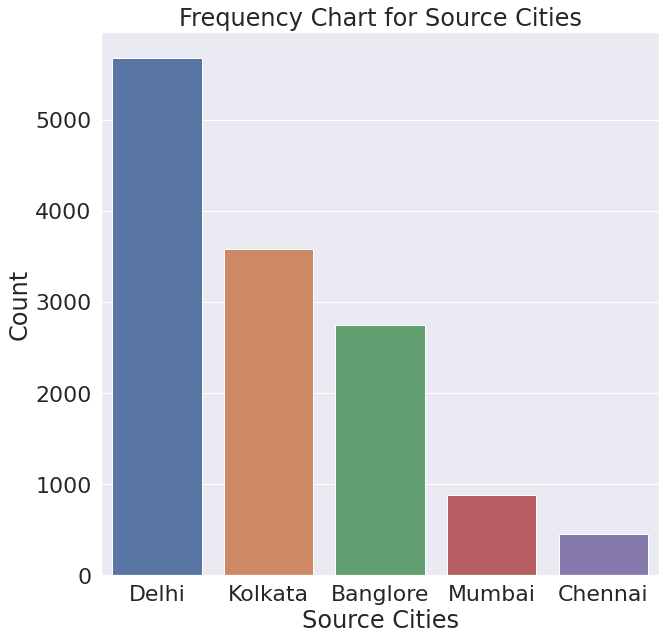

In [ ]:
sns.set(font_scale=2)
sns.barplot(data=final_df, x=final_df["Source"].value_counts().index, y=final_df["Source"].value_counts().values).set(title="Frequency Chart for Source Cities", xlabel='Source Cities', ylabel='Count')


[Text(0, 0.5, 'c'),
 Text(0.5, 0, 'Source Cities'),
 Text(0.5, 1.0, 'Frequence Chart for Source Cities')]

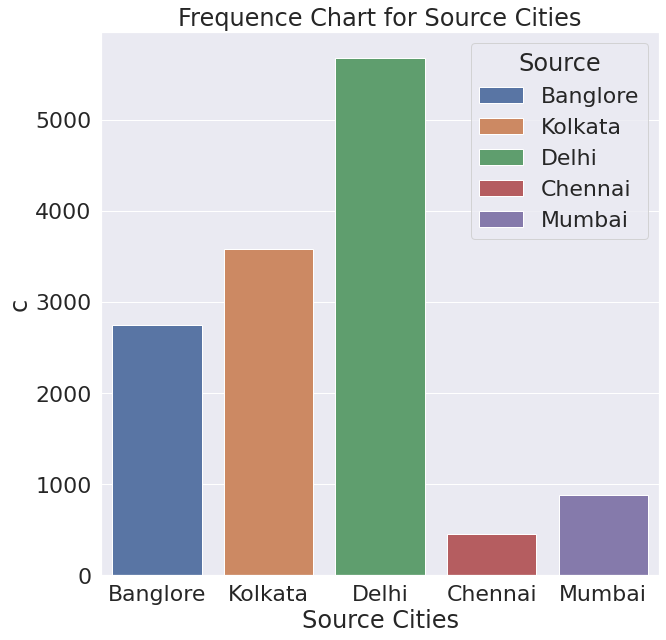

In [ ]:
sns.countplot(x=final_df["Source"], hue=final_df["Source"], data=final_df, dodge=False).set(title="Frequence Chart for Source Cities", xlabel="Source Cities", ylabel="c")


###     It can observed that the source for most of the flights is Delhi followed by kolkata, Bangalore, Mumbai and Chennai

In [ ]:
final_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

###Plotting the Frequence Chart for Destination Cities

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Destination Cities'),
 Text(0.5, 1.0, 'Frequency Chart for Destination Cities')]

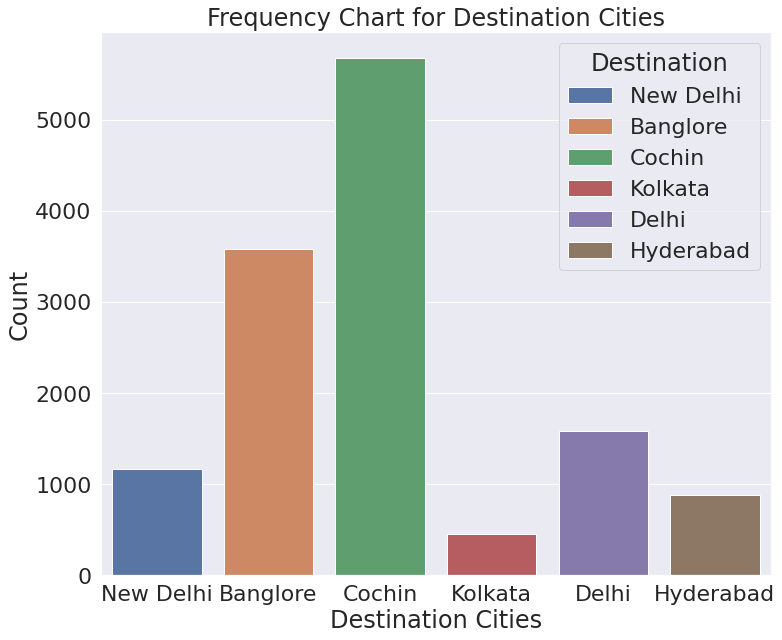

In [ ]:
matplotlib.rcParams["figure.figsize"] = (12, 10)
sns.countplot(x='Destination',hue='Destination',data=final_df,dodge=False).set(title='Frequency Chart for Destination Cities', xlabel='Destination Cities', ylabel='Count')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Destination Cities'),
 Text(0.5, 1.0, 'Frequency Chart for Destination Cities')]

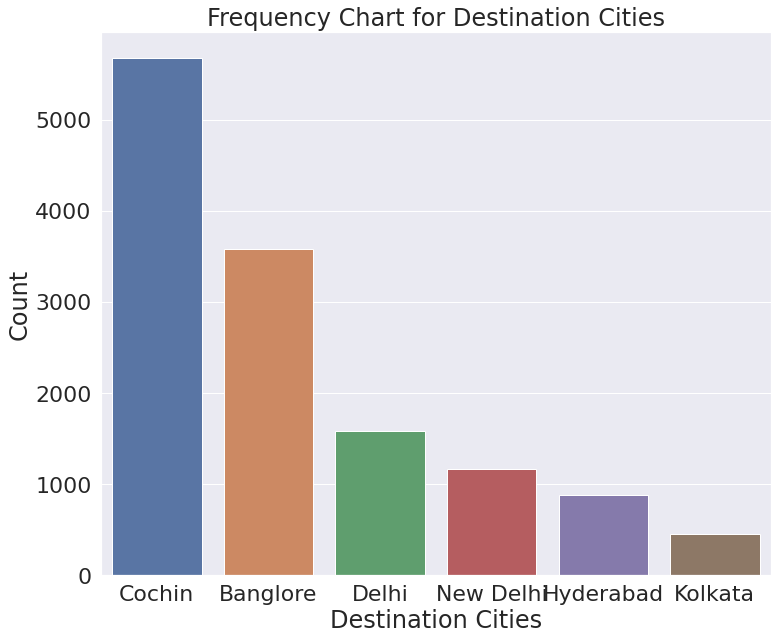

In [ ]:
sns.barplot(data=final_df, x= final_df['Destination'].value_counts().index, y=final_df['Destination'].value_counts().values).set(title='Frequency Chart for Destination Cities', xlabel='Destination Cities', ylabel='Count')


### It can be observed that the destination for most of the flights is cochin, followed by Bangalore, Delhi, New Delhi, Hyderabad and kolkata

In [ ]:
# Getting the different routes the flights travel through

final_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

### Plotting the Frequence Chart 10 most frequent Routes

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Routes'),
 Text(0.5, 1.0, 'Frequency Chart for 10 most frequent Routes')]

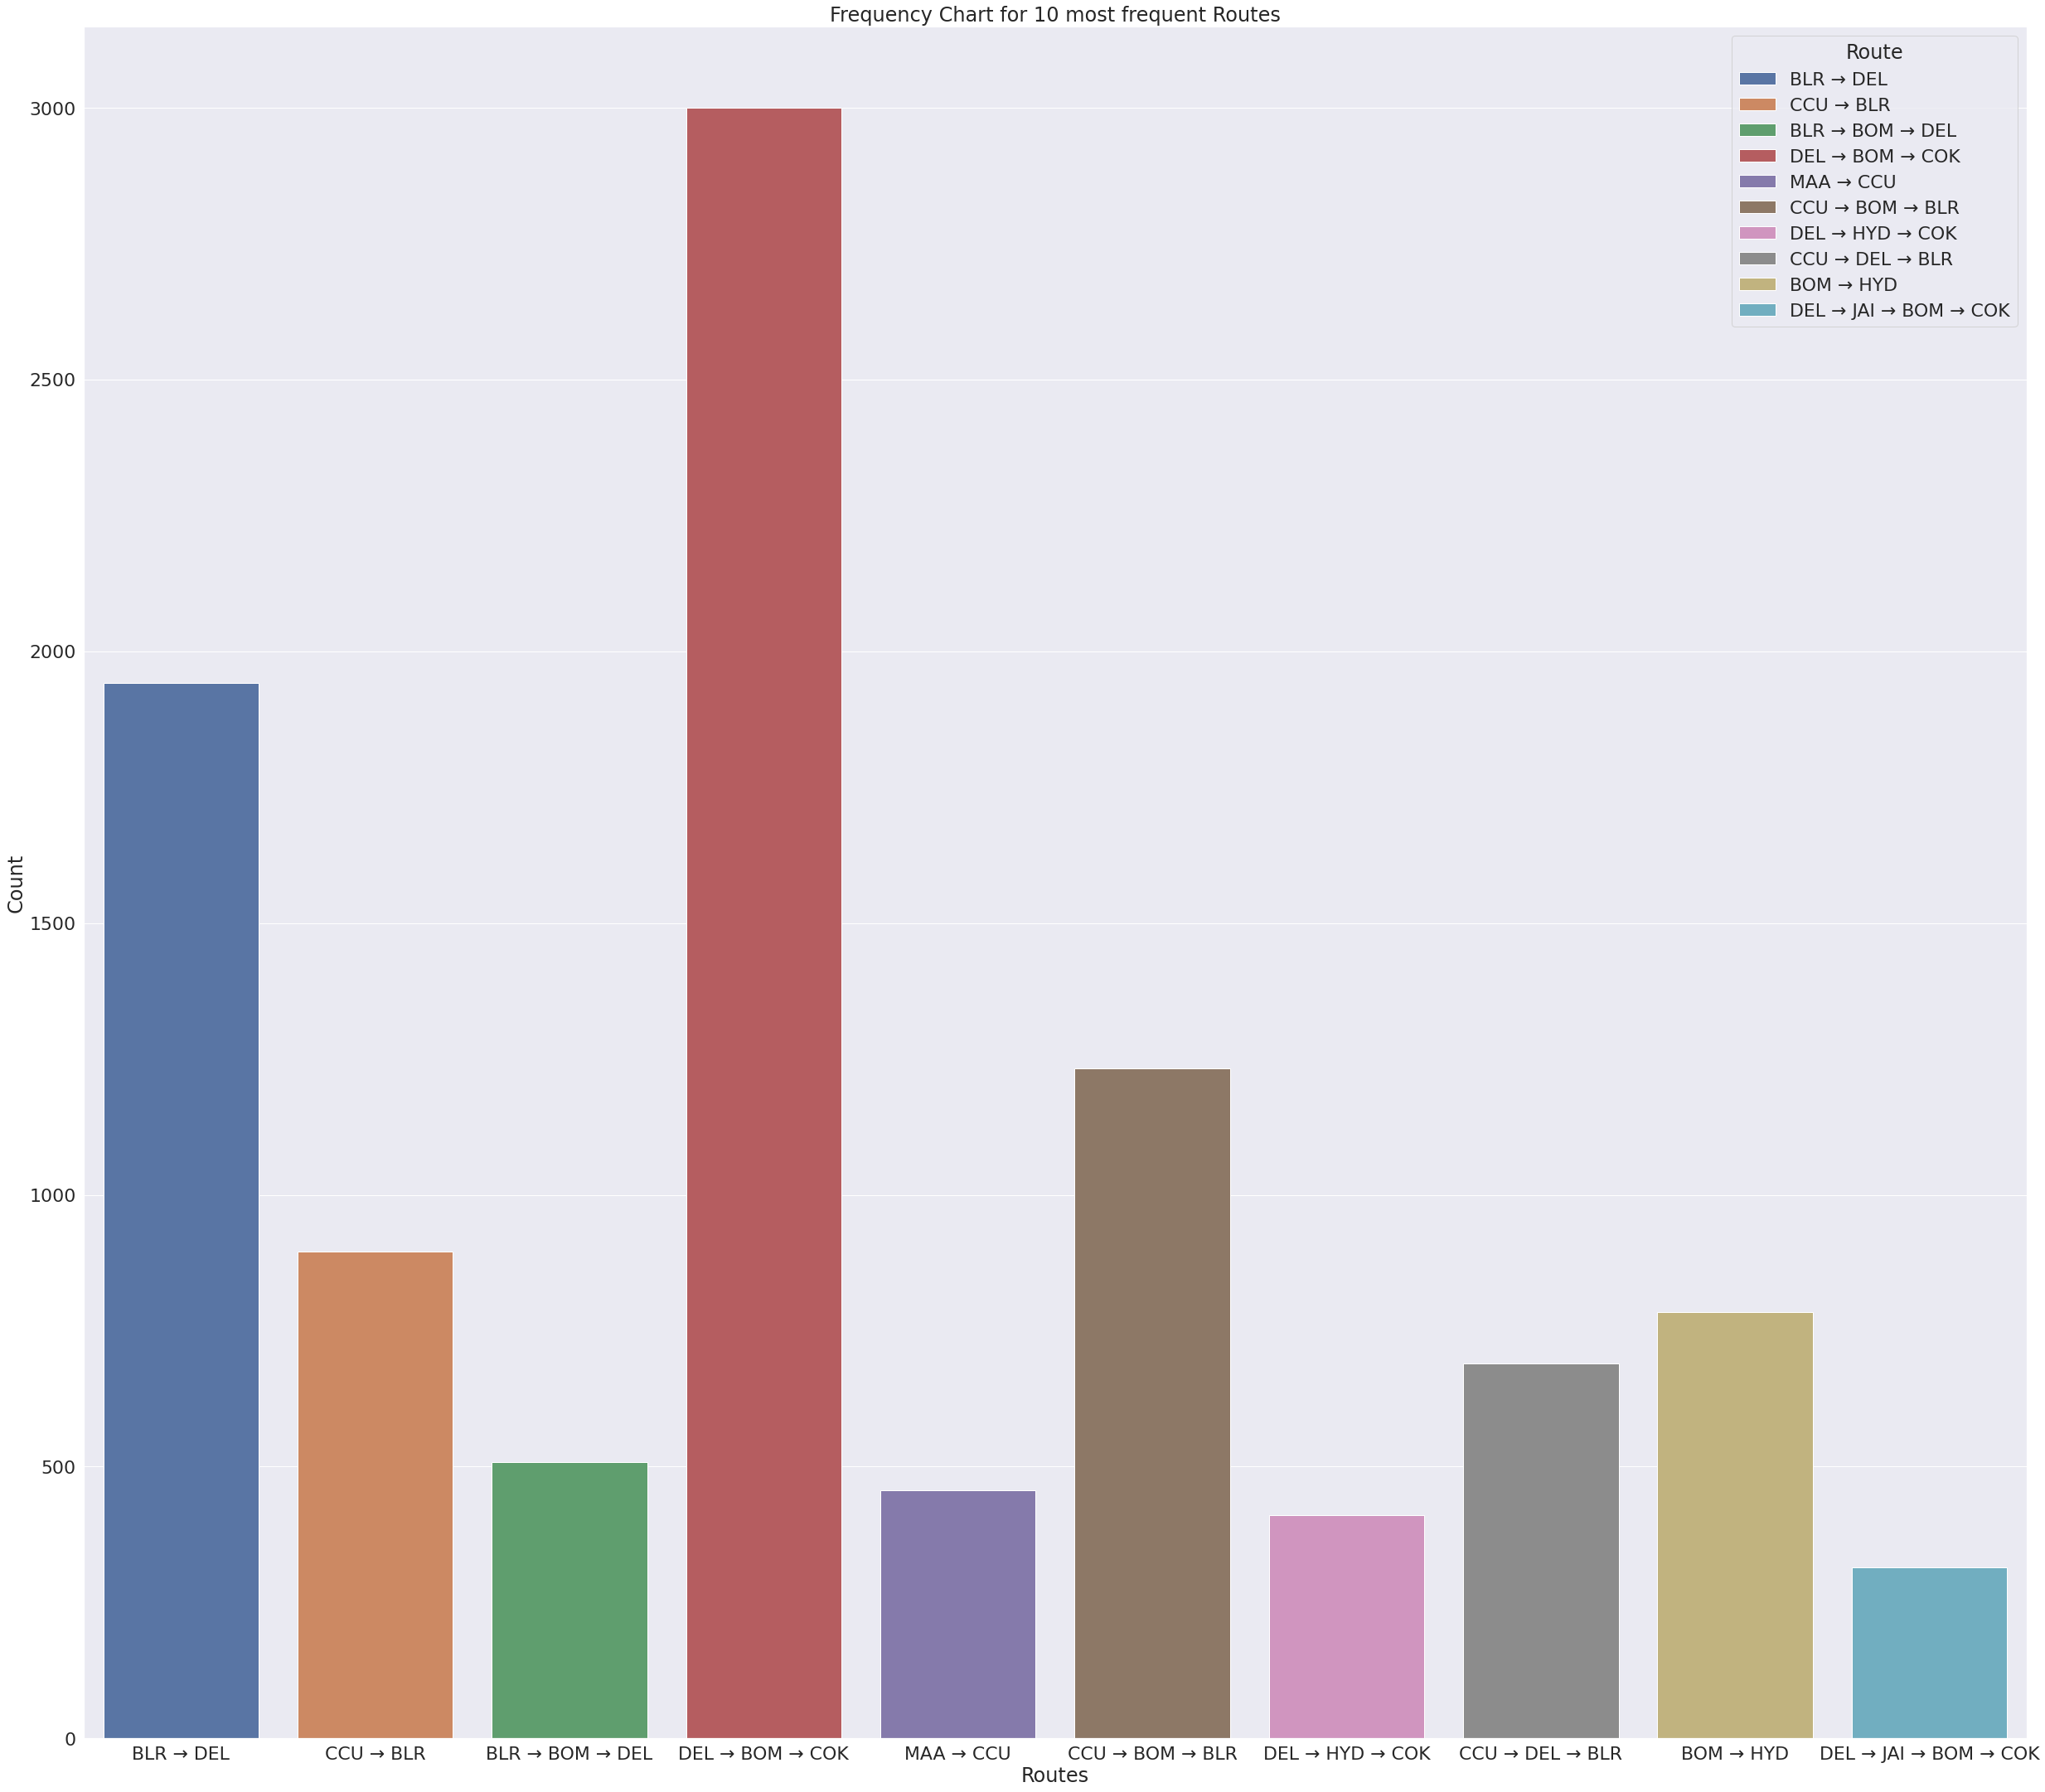

In [ ]:
matplotlib.rcParams["figure.figsize"] = (42, 38)
sns.countplot(x='Route',hue='Route',data=final_df[final_df['Route'].isin(final_df['Route'].value_counts().index[:10].tolist())],dodge=False).set(title='Frequency Chart for 10 most frequent Routes', xlabel='Routes', ylabel='Count')

### Most travelled route is Del->BOM->COK followed by BLR->DEL, CCU->BOM->BLR, CCU->BLR, BOM->HYD, CCU->DEL->BLR, BLR->BOM->DEL, MAA->CCU, DEL->HYD->COK, DEL->JAI->BOM->COK.

In [ ]:
# Getting the different number of stops for the flights
final_df["Total_Stops"].unique()

array([0., 2., 1., 3., 4.])

### Plotting the frequency chart of each number of stops for the flights

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of Stops'),
 Text(0.5, 1.0, 'Frequency Chart for Number of Stops')]

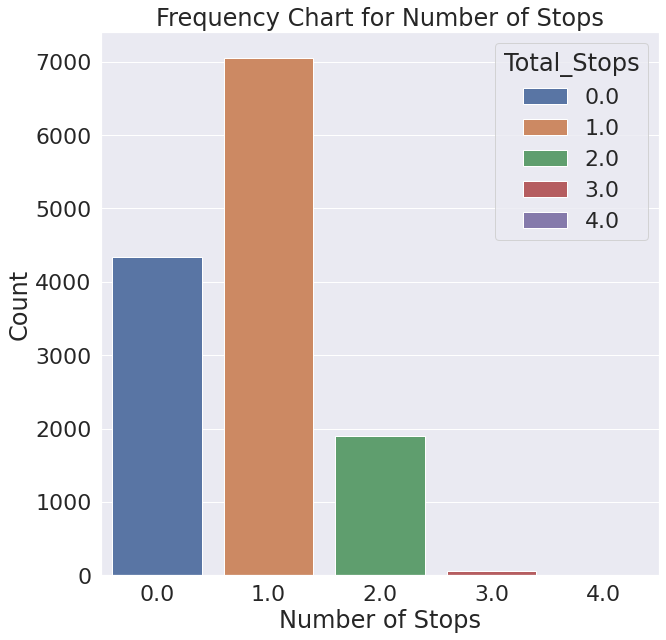

In [ ]:
matplotlib.rcParams["figure.figsize"] = (10, 10)
# sns.barplot(data=final_df, x= final_df['Total_Stops'].value_counts().index, y=final_df['Total_Stops'].value_counts().values).set(title='Frequency Chart for Number of Stops', xlabel='Number of Stops', ylabel='Count')
sns.countplot(x='Total_Stops',hue='Total_Stops',data=final_df,dodge=False).set(title='Frequency Chart for Number of Stops', xlabel='Number of Stops', ylabel='Count')


### Most flights have 1 stop during the journey followed by 0, 2, 3, 4 stops.

In [ ]:
# Getting the unique values for Additional_info.
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
# There are two unique values for representing No information namely "No info" and "No Info". Therefore every value of "No info" is replaced with "No info".
final_df["Additional_Info"].replace(to_replace="No info", value="No Info", inplace=True)

In [ ]:
final_df["Additional_Info"].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

### Plotting the frequency chart for each value of Additional_info

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Additional Information'),
 Text(0.5, 1.0, 'Frequency Chart for Additional Information')]

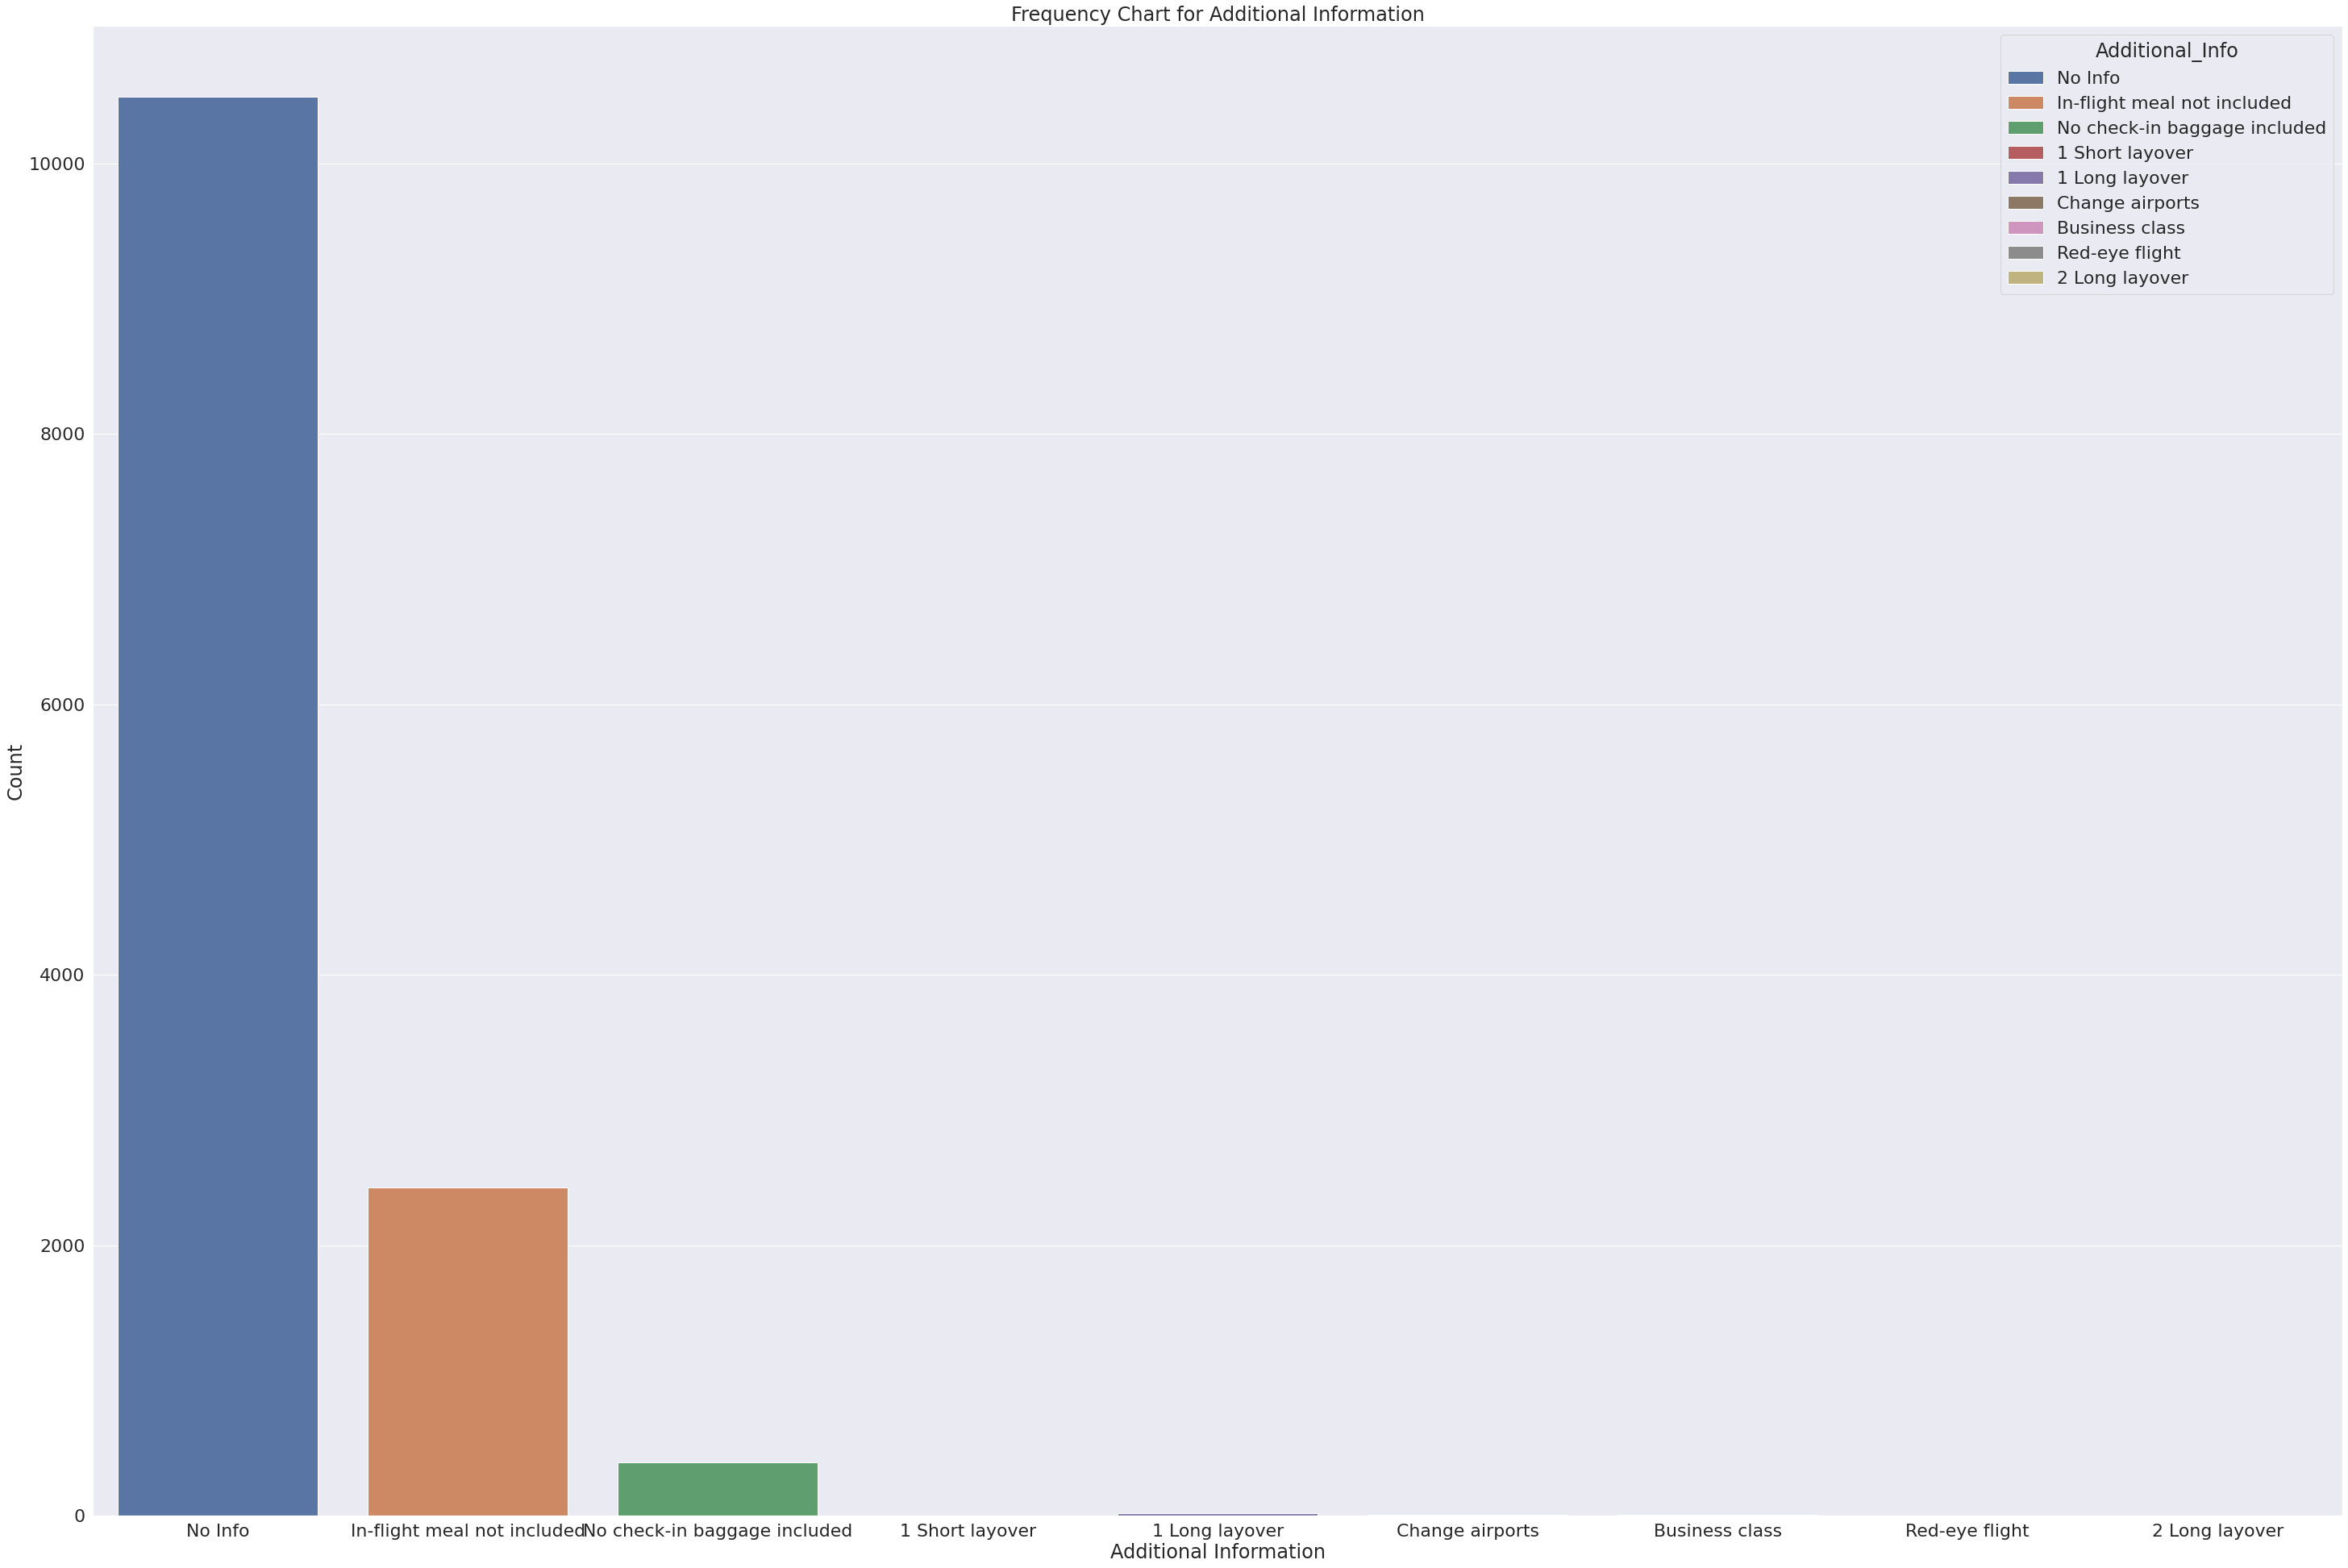

In [ ]:
matplotlib.rcParams["figure.figsize"] = (50, 34)
sns.countplot(x="Additional_Info", hue="Additional_Info", data=final_df, dodge=False).set(title='Frequency Chart for Additional Information', xlabel='Additional Information', ylabel='Count')

### Most repeated value for Additional Info is "No Info" followed by 'In-flight meal not included', 'No check-in baggage included', '1 Long layover', 'Change airports', 'Buisness class', '1 Short layover', 'Red-eye flight' and '2 Long layover'.

In [ ]:
# Getting the days in which there is flight departure
final_df["Date"].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

### Plotting the frequency chart for each day of departure

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Days'),
 Text(0.5, 1.0, 'Frequency Chart for Days')]

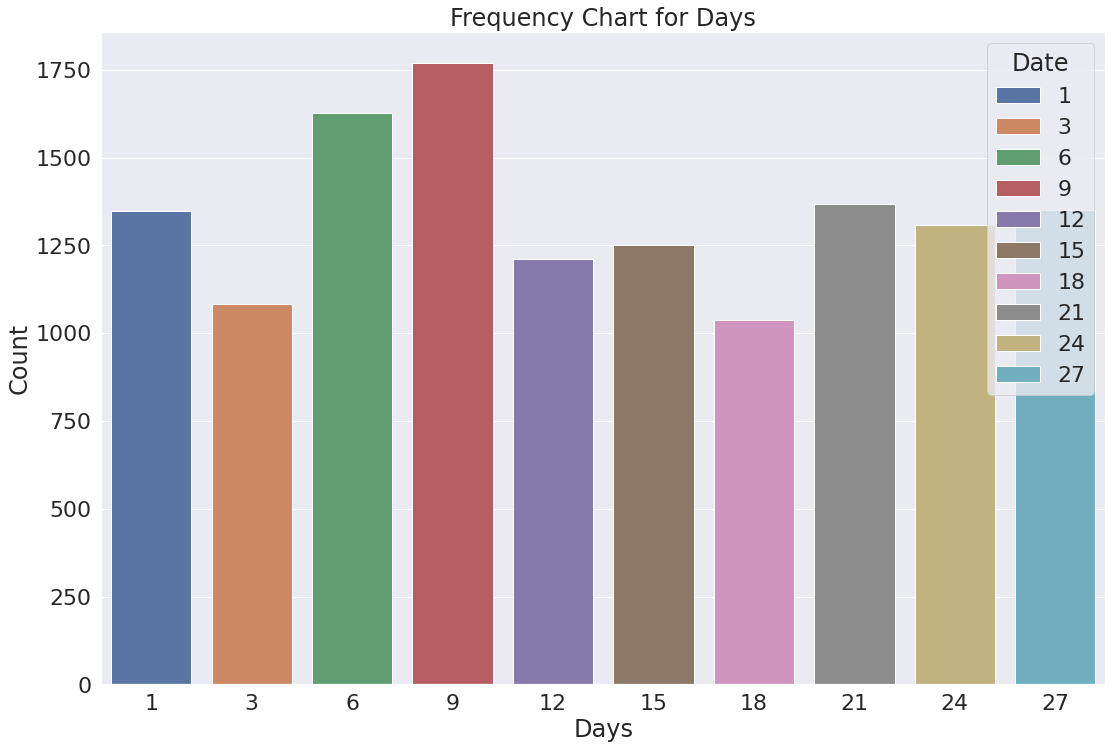

In [ ]:
matplotlib.rcParams["figure.figsize"] = (18, 12)
sns.countplot(x="Date", hue="Date", data=final_df, dodge=False).set(title="Frequency Chart for Days", xlabel="Days", ylabel="Count")

### The most frequent date for the flights is 9th of every month
### The least frequent date for the flights is 18th every month

In [ ]:
# Getting the months for the departure of flights
final_df["Month"].unique()

array([3, 5, 6, 4])

### Plotting the frequency chart for Months of departure

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'Frequency Chart for Months')]

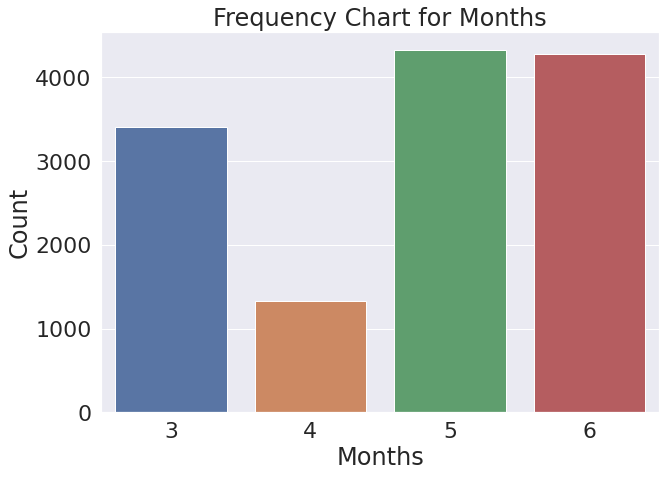

In [ ]:
matplotlib.rcParams["figure.figsize"] = (10, 7)
sns.barplot(data=final_df, x= final_df['Month'].value_counts().index, y=final_df['Month'].value_counts().values).set(title='Frequency Chart for Months', xlabel='Months', ylabel='Count')

In [ ]:
# The most frequent month for the flights is 5 i.e. May and the least freuquent month is 4 i.e. April

final_df["Year"].unique()

array([2019])

In [ ]:
# The only year the data has is 2019.Since a constant feature would not have any effect on the target, it is removed from the numerical columns list.

numerical_columns.remove("Year")

In [ ]:
final_df["Arrival Hour"].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17])

### Plotting the frequency chart for Arrival Hours

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Arrival Hours'),
 Text(0.5, 1.0, 'Frequency Chart for Arrival Hours')]

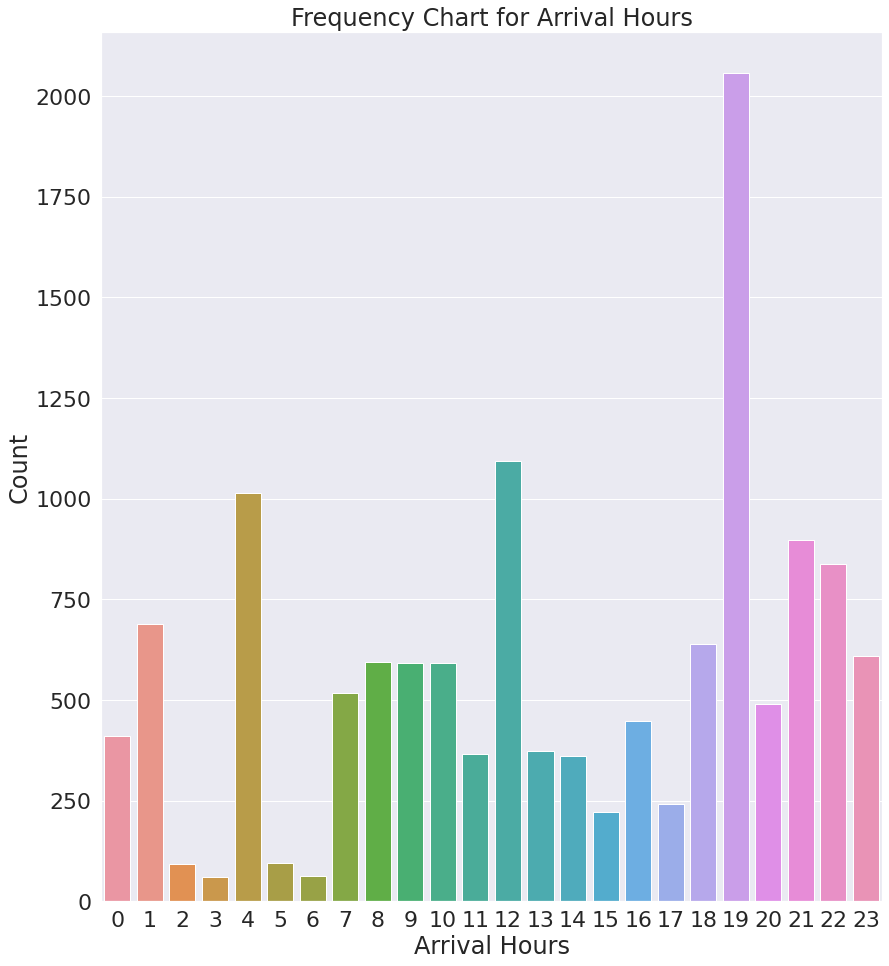

In [ ]:
matplotlib.rcParams["figure.figsize"]=(14, 16)
sns.countplot(x="Arrival Hour", data=final_df, dodge=False).set(title="Frequency Chart for Arrival Hours", xlabel="Arrival Hours", ylabel="Count")

### Observation

#### The most frequent arrival hour is 19 i.e & 7PM. The least frequent arrival hour is 3AM

In [ ]:
final_df["Arrival Minute"].unique()

array([10, 15, 25, 30, 35,  5,  0, 55, 20, 50, 45, 40])

### Plotting the frequency chart for Arrival Minutes

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Arrival Minute'),
 Text(0.5, 1.0, 'Frequency Chart for Arrival Minute')]

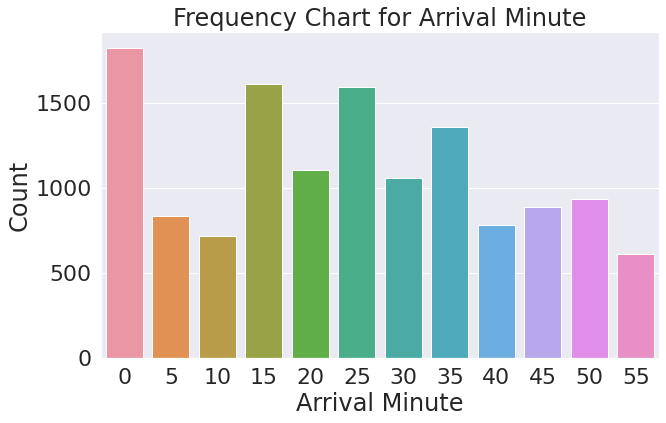

In [ ]:
matplotlib.rcParams["figure.figsize"] = (10, 6)
sns.countplot(x="Arrival Minute", data=final_df, dodge=False).set(title="Frequency Chart for Arrival Minute", xlabel="Arrival Minute", ylabel="Count")

### Observation

#### The most frequent arrival minute is 0 i.e. the start of every hour. The least frequent arrival minute is the 55th minute of every hour.

In [ ]:
final_df["Departure Hour"].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

### Plotting the frequency chart for Departure Hours

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Departure Hours'),
 Text(0.5, 1.0, 'Frequency Chart for Departure Hours')]

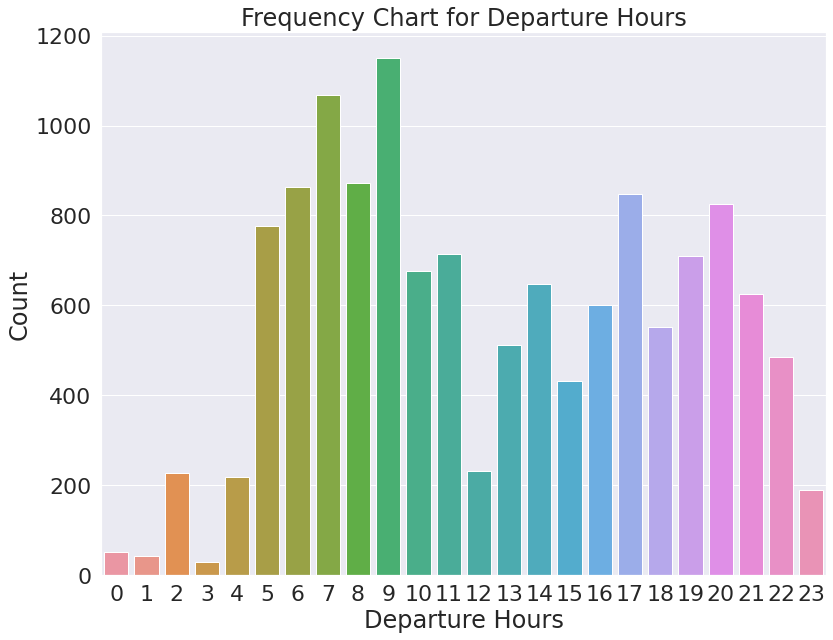

In [ ]:
matplotlib.rcParams["figure.figsize"] = (13, 10)
sns.countplot(x="Departure Hour", data=final_df, dodge=False).set(title="Frequency Chart for Departure Hours", xlabel="Departure Hours", ylabel="Count")

### It can be seen that the most frequent hour of departure is 9 and the least frequent hour is 3

### Plotting the frequency chart for Departure Minutes

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Departure Minute'),
 Text(0.5, 1.0, 'Frequency Chart for Departure Minutes')]

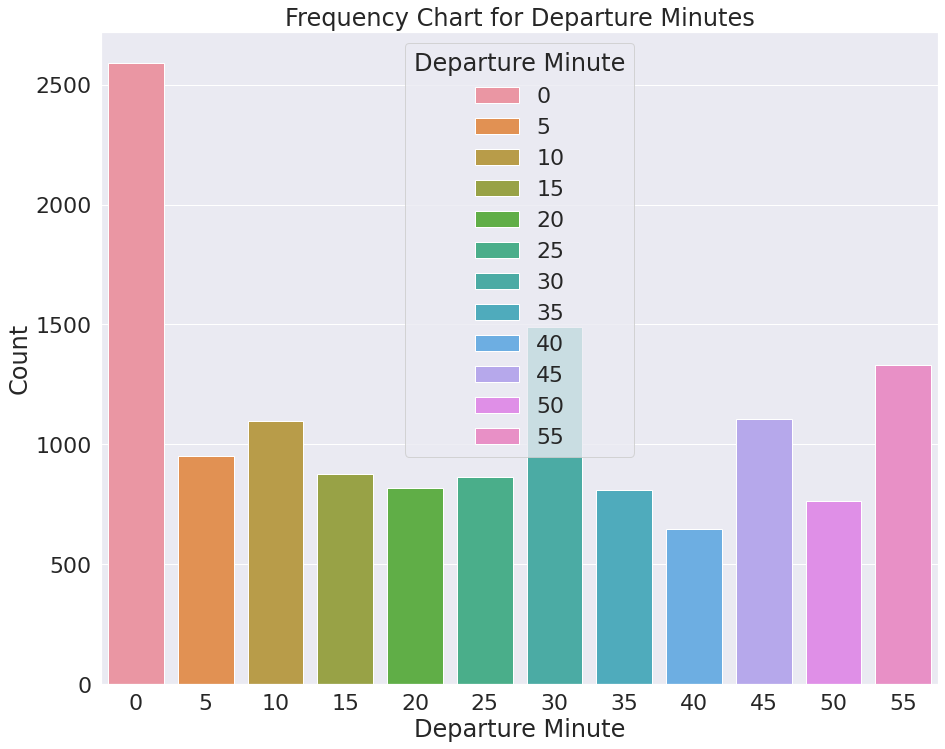

In [ ]:
matplotlib.rcParams["figure.figsize"]= (15, 12)
# sns.barplot(data=final_df, x= final_df['Departure Minute'].value_counts().index, y=final_df['Departure Minute'].value_counts().values).set(title='Frequency Chart for Departure Minutes', xlabel='Departure Minute', ylabel='Count')
sns.countplot(x='Departure Minute',hue='Departure Minute',data=final_df,dodge=False).set(title='Frequency Chart for Departure Minutes', xlabel='Departure Minute', ylabel='Count')


#### The most frequent departure minute is 0 and the least frequent departure minute is 40

### Flights with longest duration

In [ ]:
final_df["Duration Min"].max()

2860

In [ ]:
final_df[final_df["Duration Min"]== final_df["Duration Min"].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
10456,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2.0,No Info,20694.0,6,3,2019,18,50,19,10,2860


#### The maximum duration for a flight is 2860 minutes i.e. 1 day 23hours 40 minutes which was owned by Jet Airways going from Delhi to Cochin, departed Delhi on 6th March 2019 at 19:10 and arrived Cochin on 8th March 2019 at 18:50 with 2 stops, the price of which was Rs.20694.

In [ ]:
# Flights wiht Shortest Duration

final_df["Duration Min"].min()

75

In [ ]:
final_df[final_df["Duration Min"]== final_df["Duration Min"].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
844,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3625.0,24,5,2019,20,45,19,30,75
1301,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,9,5,2019,20,45,19,30,75
1322,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,5462.0,6,3,2019,20,45,19,30,75
1416,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2050.0,18,3,2019,20,45,19,30,75
2083,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2575.0,27,3,2019,20,45,19,30,75
2813,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,21,5,2019,20,45,19,30,75
3708,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,1,5,2019,20,45,19,30,75
3986,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,15,5,2019,20,45,19,30,75
4137,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,3100.0,1,6,2019,20,45,19,30,75
4806,Air India,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,2050.0,3,4,2019,20,45,19,30,75


In [ ]:
final_df[final_df["Duration Min"]== final_df["Duration Min"].min()]["Airline"].unique()

array(['Air India'], dtype=object)

In [ ]:
final_df[final_df["Duration Min"]==final_df["Duration Min"].min()]["Route"].unique()

array(['BOM → HYD'], dtype=object)

In [ ]:
final_df["Price"].describe()

count    10681.000000
mean      9085.898979
std       4610.921950
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

### Cheapest flight

In [ ]:
final_df[final_df["Price"]== final_df["Price"].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,21,3,2019,0,10,22,45,85
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,0,10,22,45,85
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,3,4,2019,0,15,22,45,90
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,7,5,5,45,80


#### The cheapest flight is owned by SpiceJet, which goes from Mumbai to Hyderabad with no stops in the middle priced at Rs. 1759

### Costliest Flight

In [ ]:
final_df[final_df["Price"]==final_df["Price"].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,79512.0,1,3,2019,11,25,5,45,340


#### The costliest flight is a Business class owned by Jet Airways Business, which goes from Bangalore to New Delhi with one stop, departed Bangalore on 1st March 2019 at 5:45 AM and arrived in New Delhi on same day at 11:25 AM, which cost Rs. 79512.

The average cost for a flight is Rs. 9085.

###Top 10 expensive flights

In [ ]:
final_df.sort_values(by="Price", ascending=False).head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,79512.0,1,3,2019,11,25,5,45,340
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,Business class,62427.0,1,3,2019,12,25,5,45,400
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1.0,Business class,57209.0,1,3,2019,14,25,9,45,280
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826.0,1,3,2019,23,0,16,55,365
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826.0,18,3,2019,0,45,18,40,365
2618,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,54826.0,18,3,2019,5,5,22,50,375
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2.0,No Info,52285.0,6,3,2019,4,25,20,5,500
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1.0,No Info,52229.0,1,3,2019,10,45,5,45,300
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2.0,No Info,46490.0,3,3,2019,4,25,20,5,500
396,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1.0,No Info,36983.0,1,3,2019,19,15,12,50,385


### Top 10 cheapest flights

In [ ]:
final_df.sort_values(by="Price", ascending=True).head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,3,4,2019,0,15,22,45,90
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,7,5,5,45,80
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,27,3,2019,0,10,22,45,85
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No Info,1759.0,21,3,2019,0,10,22,45,85
1513,Jet Airways,Mumbai,Hyderabad,BOM → HYD,0.0,In-flight meal not included,1840.0,27,3,2019,4,25,2,55,90
2415,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,18,5,2019,0,15,22,45,90
7823,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,1,4,2019,7,15,5,45,90
7292,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,12,5,2019,7,15,5,45,90
1472,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,21,5,2019,14,45,13,15,90
1718,SpiceJet,Mumbai,Hyderabad,BOM → HYD,0.0,No check-in baggage included,1965.0,24,5,2019,7,15,5,45,90


## Data Preprocessing

### Label encoding the categorical columns

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
final_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No Info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No Info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No Info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No Info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No Info,13302.0,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1.0,No Info,NaN,6,6,2019,20,25,20,30,1435
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No Info,NaN,27,3,2019,16,55,14,20,155
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1.0,No Info,NaN,6,3,2019,4,25,21,50,395
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1.0,No Info,NaN,6,3,2019,19,15,4,0,915


In [ ]:
encoders = {}
for col in categorical_cols:
    le = LabelEncoder().fit(final_df[col])
    final_df[col] = le.transform(final_df[col])
    encoders[col] = le

In [ ]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,BLR → DEL,0.0,6,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,CCU → IXR → BBI → BLR,2.0,6,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,DEL → LKO → BOM → COK,2.0,6,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,CCU → NAG → BLR,1.0,6,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,BLR → NAG → DEL,1.0,6,13302.0,1,3,2019,21,35,16,50,285


### Removing the Route column from the dataframe

In [ ]:
final_df.drop("Route", axis=1, inplace=True)

In [ ]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,0.0,6,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,6,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2.0,6,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1.0,6,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1.0,6,13302.0,1,3,2019,21,35,16,50,285


### Saving the processed data into separate training and test dataset

In [ ]:
test_df = final_df[final_df["Price"].isnull()]

In [ ]:
test_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,4,2,1,1.0,6,NaN,6,6,2019,4,25,17,30,655
1,3,3,0,1.0,6,NaN,12,5,2019,10,20,6,20,240
2,4,2,1,1.0,5,NaN,21,5,2019,19,0,19,15,1425
3,6,2,1,1.0,6,NaN,21,5,2019,21,0,8,0,780
4,0,0,2,0.0,6,NaN,24,6,2019,2,45,23,55,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,6,NaN,6,6,2019,20,25,20,30,1435
2667,3,3,0,0.0,6,NaN,27,3,2019,16,55,14,20,155
2668,4,2,1,1.0,6,NaN,6,3,2019,4,25,21,50,395
2669,1,2,1,1.0,6,NaN,6,3,2019,19,15,4,0,915


### Removing the Price column from the dataframe, because that is what will be predicted using the available data.

In [ ]:
test_df.drop("Price", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_df = final_df[final_df["Price"].notna()]

In [ ]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,0.0,6,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,6,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2.0,6,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1.0,6,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1.0,6,13302.0,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0.0,6,4107.0,9,4,2019,22,25,19,55,150
10679,1,3,0,0.0,6,4145.0,27,4,2019,23,20,20,45,155
10680,4,0,2,0.0,6,7229.0,27,4,2019,11,20,8,20,180
10681,10,0,5,0.0,6,12648.0,1,3,2019,14,10,11,30,160


In [ ]:
train_target = train_df["Price"]
train_target

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10681, dtype: float64

In [ ]:
train_df.drop("Price", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,3,0,5,0.0,6,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,6,1,5,2019,13,15,5,50,445
2,4,2,1,2.0,6,9,6,2019,4,25,9,25,1140
3,3,3,0,1.0,6,12,5,2019,23,30,18,5,325
4,3,0,5,1.0,6,1,3,2019,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0.0,6,9,4,2019,22,25,19,55,150
10679,1,3,0,0.0,6,27,4,2019,23,20,20,45,155
10680,4,0,2,0.0,6,27,4,2019,11,20,8,20,180
10681,10,0,5,0.0,6,1,3,2019,14,10,11,30,160


### Scaling the features

In [ ]:
scaler = MinMaxScaler()
train_df=scaler.fit_transform(train_df)

In [ ]:
train_df

array([[0.27272727, 0.        , 1.        , ..., 0.95652174, 0.36363636,
        0.03411131],
       [0.09090909, 0.75      , 0.        , ..., 0.2173913 , 0.90909091,
        0.13285458],
       [0.36363636, 0.5       , 0.2       , ..., 0.39130435, 0.45454545,
        0.38240575],
       ...,
       [0.36363636, 0.        , 0.4       , ..., 0.34782609, 0.36363636,
        0.03770197],
       [0.90909091, 0.        , 1.        , ..., 0.47826087, 0.54545455,
        0.03052065],
       [0.09090909, 0.5       , 0.2       , ..., 0.43478261, 1.        ,
        0.15260323]])

###The training set is converted to an array and it needs to be converted back into a dataframe.



In [ ]:
train_df = pd.DataFrame(train_df)
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.272727,0.00,1.0,0.00,0.75,0.884615,0.000000,0.0,0.043478,0.181818,0.956522,0.363636,0.034111
1,0.090909,0.75,0.0,0.50,0.75,0.000000,0.666667,0.0,0.565217,0.272727,0.217391,0.909091,0.132855
2,0.363636,0.50,0.2,0.50,0.75,0.307692,1.000000,0.0,0.173913,0.454545,0.391304,0.454545,0.382406
3,0.272727,0.75,0.0,0.25,0.75,0.423077,0.666667,0.0,1.000000,0.545455,0.782609,0.090909,0.089767
4,0.272727,0.00,1.0,0.25,0.75,0.000000,0.000000,0.0,0.913043,0.636364,0.695652,0.909091,0.075404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0.000000,0.75,0.0,0.00,0.75,0.307692,0.333333,0.0,0.956522,0.454545,0.826087,1.000000,0.026930
10677,0.090909,0.75,0.0,0.00,0.75,1.000000,0.333333,0.0,1.000000,0.363636,0.869565,0.818182,0.028725
10678,0.363636,0.00,0.4,0.00,0.75,1.000000,0.333333,0.0,0.478261,0.363636,0.347826,0.363636,0.037702
10679,0.909091,0.00,1.0,0.00,0.75,0.000000,0.000000,0.0,0.608696,0.181818,0.478261,0.545455,0.030521


In [ ]:
# Labeling the columns
print(test_df.columns.tolist())

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Date', 'Month', 'Year', 'Arrival Hour', 'Arrival Minute', 'Departure Hour', 'Departure Minute', 'Duration Min']


In [ ]:
train_df.columns = test_df.columns.tolist()

In [ ]:
train_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
0,0.272727,0.00,1.0,0.00,0.75,0.884615,0.000000,0.0,0.043478,0.181818,0.956522,0.363636,0.034111
1,0.090909,0.75,0.0,0.50,0.75,0.000000,0.666667,0.0,0.565217,0.272727,0.217391,0.909091,0.132855
2,0.363636,0.50,0.2,0.50,0.75,0.307692,1.000000,0.0,0.173913,0.454545,0.391304,0.454545,0.382406
3,0.272727,0.75,0.0,0.25,0.75,0.423077,0.666667,0.0,1.000000,0.545455,0.782609,0.090909,0.089767
4,0.272727,0.00,1.0,0.25,0.75,0.000000,0.000000,0.0,0.913043,0.636364,0.695652,0.909091,0.075404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0.000000,0.75,0.0,0.00,0.75,0.307692,0.333333,0.0,0.956522,0.454545,0.826087,1.000000,0.026930
10677,0.090909,0.75,0.0,0.00,0.75,1.000000,0.333333,0.0,1.000000,0.363636,0.869565,0.818182,0.028725
10678,0.363636,0.00,0.4,0.00,0.75,1.000000,0.333333,0.0,0.478261,0.363636,0.347826,0.363636,0.037702
10679,0.909091,0.00,1.0,0.00,0.75,0.000000,0.000000,0.0,0.608696,0.181818,0.478261,0.545455,0.030521


### Splitting the data into training and validation dataset

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_df, train_target, test_size=0.20, random_state=42)

In [ ]:
train_input

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
10609,0.363636,1.00,0.6,0.00,0.625,0.653846,0.666667,0.0,0.347826,0.545455,0.304348,0.090909,0.003591
1034,0.727273,0.50,0.2,0.25,0.750,0.884615,0.333333,0.0,0.956522,0.090909,0.652174,0.818182,0.109515
8122,0.272727,0.75,0.0,0.00,0.750,1.000000,0.000000,0.0,0.347826,0.363636,0.217391,0.545455,0.034111
4779,0.363636,0.00,1.0,0.25,0.750,0.538462,0.000000,0.0,0.521739,0.363636,0.217391,0.909091,0.113106
3207,0.090909,0.50,0.2,0.50,0.750,0.192308,1.000000,0.0,0.826087,0.272727,0.217391,1.000000,0.260323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.363636,0.00,1.0,0.25,0.625,0.538462,0.000000,0.0,0.521739,0.454545,0.304348,0.000000,0.089767
5191,0.363636,0.75,0.0,0.25,0.750,0.423077,0.666667,0.0,0.391304,0.818182,0.391304,0.636364,0.493716
5390,0.363636,0.50,0.2,0.50,0.750,0.884615,1.000000,0.0,0.826087,0.000000,1.000000,0.090909,0.402154
860,0.272727,0.00,1.0,0.00,0.750,0.076923,0.000000,0.0,0.130435,0.454545,0.000000,0.727273,0.032316


In [ ]:
train_target

10611     4050.0
1034      5583.0
8124      4148.0
4780      9623.0
3208     10861.0
          ...   
5735      9134.0
5192     14151.0
5391     12819.0
860       6144.0
7272      6151.0
Name: Price, Length: 8544, dtype: float64

In [ ]:
val_input

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival Hour,Arrival Minute,Departure Hour,Departure Minute,Duration Min
4830,0.090909,0.75,0.0,0.25,0.750,0.307692,1.000000,0.0,0.869565,0.454545,0.304348,0.000000,0.262118
3771,0.363636,0.00,0.4,0.00,0.625,0.538462,0.666667,0.0,0.608696,0.090909,0.478261,0.181818,0.035907
1523,0.363636,0.50,0.2,0.25,0.625,1.000000,0.000000,0.0,0.826087,0.818182,0.826087,0.272727,0.500898
3393,0.727273,0.00,1.0,0.00,0.750,0.076923,0.000000,0.0,0.521739,0.545455,0.391304,0.636364,0.035907
4169,0.363636,0.75,0.0,0.25,0.750,0.307692,1.000000,0.0,0.782609,0.272727,0.347826,0.454545,0.184919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9869,0.727273,0.75,0.0,0.00,0.750,0.192308,0.000000,0.0,0.826087,0.818182,0.739130,0.272727,0.026930
10061,0.000000,0.50,0.2,0.25,0.750,0.769231,0.333333,0.0,0.956522,0.454545,0.304348,1.000000,0.285458
6911,0.090909,0.00,0.4,0.00,0.750,0.653846,0.333333,0.0,0.826087,0.818182,0.739130,0.000000,0.032316
8616,0.363636,0.75,0.0,0.25,0.750,0.307692,1.000000,0.0,0.173913,0.727273,0.695652,0.545455,0.235189


In [ ]:
val_target

4831     10413.0
3772      4030.0
1523      5963.0
3394      6860.0
4170     14571.0
          ...   
9871      4622.0
10063     7452.0
6913      6121.0
8618     13731.0
8990     23528.0
Name: Price, Length: 2137, dtype: float64

### Converting all into the parquet format

In [ ]:
train_input.to_parquet("train_inputs.parquet")
pd.DataFrame(train_target).to_parquet("train_target.parquet")
val_input.to_parquet("val_input.parquet")
pd.DataFrame(val_target).to_parquet("val_target.parquet")

In [ ]:
train_input = pd.read_parquet("train_inputs.parquet")
train_target = pd.read_parquet("train_target.parquet")
val_input = pd.read_parquet("val_input.parquet")
val_target = pd.read_parquet("val_target.parquet")

### Training the model
XGBoost model is chosen due to reliability

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(train_input, train_target)

[05:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
model.score(train_input, train_target)

0.8314888806427363

In [ ]:
model.score(val_input, val_target)

0.8117000223127386

In [ ]:
model.predict(test_df)

array([13495.184, 14637.215, 13847.546, ..., 13495.184, 12172.655,
       13495.184], dtype=float32)

### Comparing the feature importance

In [ ]:
model.feature_importances_

array([0.08010388, 0.01456485, 0.04768353, 0.07795098, 0.08237926,
       0.10478405, 0.05732277, 0.        , 0.01323132, 0.00705453,
       0.01075236, 0.00985996, 0.49431247], dtype=float32)

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0.5, 1.0, 'Feature Importance Chart')]

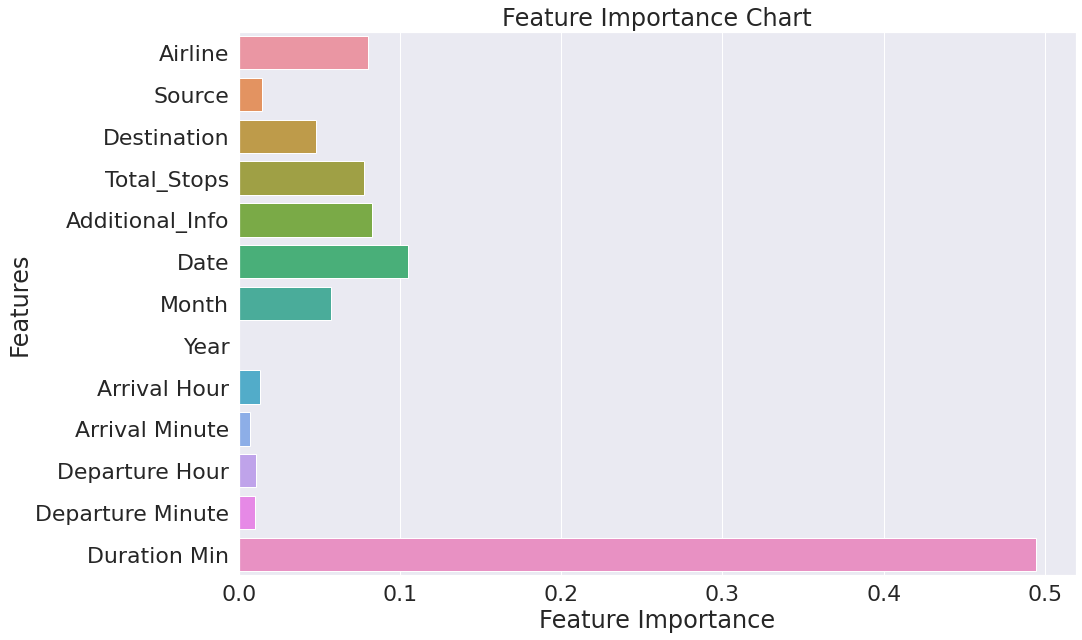

In [ ]:
matplotlib.rcParams["figure.figsize"]=(15, 10)
sns.barplot(x=model.feature_importances_, y=train_df.columns.to_list(), orient='h').set(title='Feature Importance Chart', xlabel='Feature Importance', ylabel='Features')


It can seen from the above graph that the most important feature in predicting the price of the flight ticker is Duration Minutes and Arrival Minute is the least important

In [ ]:
model_dict={
    "model":model,
    "scaler": scaler,
    "numerical columns":numerical_columns,
    "categorical columns":categorical_cols,
    "encoders":encoders
}

joblib.dump(model_dict, "flight price prediction model.joblib")

['flight price prediction model.joblib']

In [ ]:
print(model_dict)

{'model': XGBRegressor(), 'scaler': MinMaxScaler(), 'numerical columns': ['Total_Stops', 'Date', 'Month', 'Arrival Hour', 'Arrival Minute', 'Departure Hour', 'Departure Minute', 'Duration Min'], 'categorical columns': ['Airline', 'Source', 'Destination', 'Additional_Info'], 'encoders': {'Airline': LabelEncoder(), 'Source': LabelEncoder(), 'Destination': LabelEncoder(), 'Additional_Info': LabelEncoder()}}


In [ ]:
complete_model = joblib.load("flight price prediction model.joblib")
model = complete_model["model"]
scaler = complete_model["scaler"]
numerical_columns = complete_model["numerical columns"]
categorial_columns = complete_model["categorical columns"]

[05:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred = model.predict(train_input)
print(pred)

[ 4959.423   7519.6445  4770.1104 ... 14664.512   7385.0327  5972.471 ]


In [ ]:
# Finding the Route Mean Squared Error(RMSE) of the prediction from the actual values
print(sqrt(mean_squared_error(train_target, pred)))

1876.619053519297


The prediction have an RMSE of Rs. 1876.61

### Excluding the feature with the least importane to see if that improves the accuracy score

In [ ]:
model.get_booster().feature_names

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Date',
 'Month',
 'Year',
 'Arrival Hour',
 'Arrival Minute',
 'Departure Hour',
 'Departure Minute',
 'Duration Min']

In [ ]:
model.fit(train_input[train_input.columns.difference(["Arrival Minute", "Departure Hour", "Departure Minute"])], train_target)

[05:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(missing=nan)

In [ ]:
model.score(train_input[train_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], train_target)

0.8275482416218977

In [ ]:
model.score(val_input[val_input.columns.difference(['Arrival Minute', 'Departure Hour', 'Departure Minute'])], val_target)

0.8099798086255169

In [ ]:
model_1 = XGBRegressor()

In [ ]:
model_1.fit(train_input[train_input.columns.difference(["Arrival Minute"])], train_target)

[05:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
model_1.score(train_input[train_input.columns.difference(["Arrival Minute"])], train_target)

0.8300505661271864

In [ ]:
model_1.score(val_input[train_input.columns.difference(["Arrival Minute"])], val_target)

0.8107564384583745

In [ ]:
model_1.fit(train_input[train_input.columns.difference(["Arrival Minute", "Departure Hour"])], train_target)

[05:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
model_1.score(train_input[train_input.columns.difference(["Arrival Minute", "Departure Hour"])], train_target)

0.8299527660194448

In [ ]:
model_1.score(val_input[train_input.columns.difference(["Arrival Minute", "Departure Hour"])], val_target)

0.8140454353352831